<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__3)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-3.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.807540,51.749142,64.683063,-0.478197,197.761547,198.301293,-0.539746
1,0.0,1.0,61.889789,52.265583,39.663496,-0.382886,163.435981,163.789064,-0.353083
2,0.0,2.0,25.886902,87.225507,99.487619,-0.128254,222.471775,222.676262,-0.204487
3,0.0,3.0,48.284423,87.106729,95.991747,0.498538,241.881436,241.521280,0.360156
4,0.0,4.0,95.358500,48.997685,79.840132,-0.573460,233.622856,234.363593,-0.740736
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.776373,77.401444,71.425208,-0.435208,229.167817,229.716809,-0.548992
249996,999.0,246.0,72.523764,65.475803,26.237465,0.574039,174.811072,174.417422,0.393649
249997,999.0,247.0,26.953106,97.233749,20.793028,0.345329,155.325212,155.104268,0.220943
249998,999.0,248.0,57.956420,32.747484,94.442004,-0.743249,194.402658,195.006646,-0.603988


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.807540  51.749142  64.683063  ...  197.761547  198.301293 -0.539746
      1.0    61.889789  52.265583  39.663496  ...  163.435981  163.789064 -0.353083
      2.0    25.886902  87.225507  99.487619  ...  222.471775  222.676262 -0.204487
      3.0    48.284423  87.106729  95.991747  ...  241.881436  241.521280  0.360156
      4.0    95.358500  48.997685  79.840132  ...  233.622856  234.363593 -0.740736
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  70.776373  77.401444  71.425208  ...  229.167817  229.716809 -0.548992
      246.0  72.523764  65.475803  26.237465  ...  174.811072  174.417422  0.393649
      247.0  26.953106  97.233749  20.793028  ...  155.325212  155.104268  0.220943
      248.0  57.956420  32.747484  94.442004  ...  194.402658  195.006646 -0.603988
      249.0  87.092223  83.095532  57.350756  ...  236.725867  237.766161 -1.040294

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.807540  51.749142  64.683063  ...  197.761547  198.301293 -0.539746
      1.0    61.889789  52.265583  39.663496  ...  163.435981  163.789064 -0.353083
      2.0    25.886902  87.225507  99.487619  ...  222.471775  222.676262 -0.204487
      3.0    48.284423  87.106729  95.991747  ...  241.881436  241.521280  0.360156
      4.0    95.358500  48.997685  79.840132  ...  233.622856  234.363593 -0.740736
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  70.776373  77.401444  71.425208  ...  229.167817  229.716809 -0.548992
      246.0  72.523764  65.475803  26.237465  ...  174.811072  174.417422  0.393649
      247.0  26.953106  97.233749  20.793028  ...  155.325212  155.104268  0.220943
      248.0  57.956420  32.747484  94.442004  ...  194.402658  195.006646 -0.603988
      249.0  87.092223  83.095532  57.350756  ...  236.725867  237.766161 -1.040294

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,level_0,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0,0.0,0.0,71.807540,51.749142,64.683063,-0.478197,197.761547,198.301293,-0.539746
1,1,0.0,1.0,61.889789,52.265583,39.663496,-0.382886,163.435981,163.789064,-0.353083
2,2,0.0,2.0,25.886902,87.225507,99.487619,-0.128254,222.471775,222.676262,-0.204487
3,3,0.0,3.0,48.284423,87.106729,95.991747,0.498538,241.881436,241.521280,0.360156
4,4,0.0,4.0,95.358500,48.997685,79.840132,-0.573460,233.622856,234.363593,-0.740736
...,...,...,...,...,...,...,...,...,...,...
249995,249995,999.0,245.0,70.776373,77.401444,71.425208,-0.435208,229.167817,229.716809,-0.548992
249996,249996,999.0,246.0,72.523764,65.475803,26.237465,0.574039,174.811072,174.417422,0.393649
249997,249997,999.0,247.0,26.953106,97.233749,20.793028,0.345329,155.325212,155.104268,0.220943
249998,249998,999.0,248.0,57.956420,32.747484,94.442004,-0.743249,194.402658,195.006646,-0.603988


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

level_0         x1         x2  ...           Y       y_hat     e_hat
rep   index                                 ...                                  
0.0   0.0          0  71.807540  51.749142  ...  197.761547  198.301293 -0.539746
      1.0          1  61.889789  52.265583  ...  163.435981  163.789064 -0.353083
      2.0          2  25.886902  87.225507  ...  222.471775  222.676262 -0.204487
      3.0          3  48.284423  87.106729  ...  241.881436  241.521280  0.360156
      4.0          4  95.358500  48.997685  ...  233.622856  234.363593 -0.740736
...              ...        ...        ...  ...         ...         ...       ...
999.0 245.0   249995  70.776373  77.401444  ...  229.167817  229.716809 -0.548992
      246.0   249996  72.523764  65.475803  ...  174.811072  174.417422  0.393649
      247.0   249997  26.953106  97.233749  ...  155.325212  155.104268  0.220943
      248.0   249998  57.956420  32.747484  ...  194.402658  195.006646 -0.603988
      249.0   249999  87.092223  83.095532  ...  236.725867  237.766161 -1.040294

[250000 rows x 8 columns]

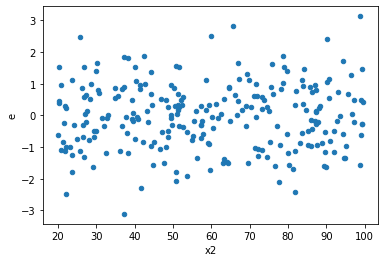

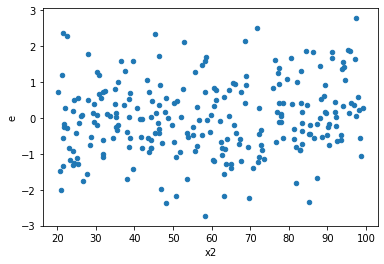

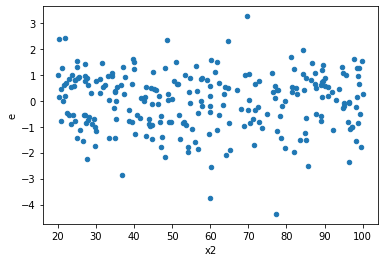

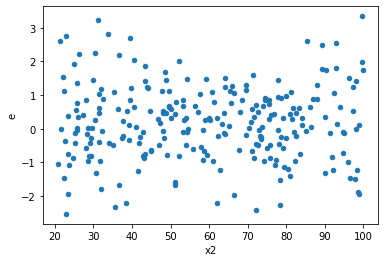

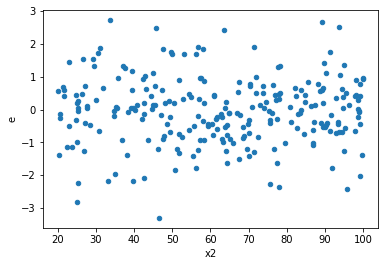

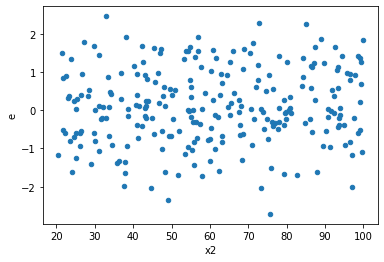

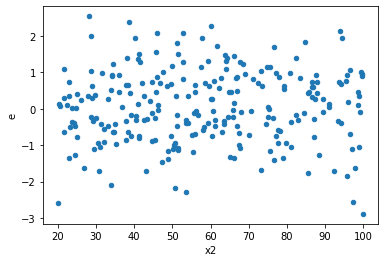

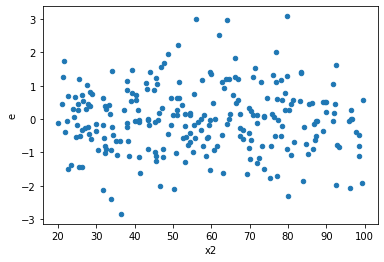

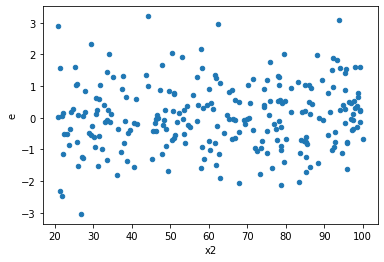

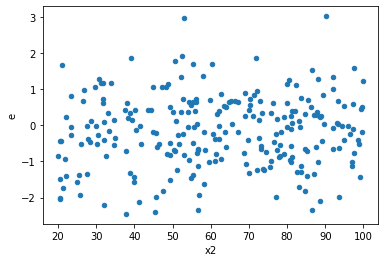

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,119.0,125.0,107.97822837414792,153.11826408832988,0.9073800703709909,1.224946112706639,1.3499812842547978,0.09816007507031,0.950919962464845,0.049080037535155,Reject005=1 : Homoscedasticity
3.0,120.0,124.0,129.3092281121267,147.70635633601498,1.0775769009343892,1.191180293032379,1.1054248583089354,0.5800196796343897,0.7099901601828051,0.29000983981719486,Reject005=1 : Homoscedasticity
4.0,120.0,124.0,97.9352550691109,106.62580509439158,0.8161271255759242,0.8598855249547708,1.0536171363596905,0.7727106065808114,0.6136446967095943,0.3863553032904057,Reject005=1 : Homoscedasticity
7.0,116.0,128.0,93.529136074364,122.82972892577672,0.8062856558134828,0.9596072572326306,1.1901579177474733,0.33603482741875146,0.8319825862906243,0.16801741370937573,Reject005=1 : Homoscedasticity
9.0,114.0,130.0,104.28170931684618,140.67626547219155,0.9147518361126857,1.0821251190168582,1.1829712456390786,0.3527841515627004,0.8236079242186498,0.1763920757813502,Reject005=1 : Homoscedasticity
13.0,128.0,116.0,134.9191459225688,160.4381930316258,1.0540558275200687,1.3830878709622914,1.3121580801050674,0.13703556150113605,0.931482219249432,0.06851778075056802,Reject005=1 : Homoscedasticity
15.0,107.0,137.0,102.11554851986408,135.37587000145732,0.9543509207463933,0.9881450365069877,1.0354105759484826,0.8430879811078236,0.5784560094460882,0.4215439905539118,Reject005=1 : Homoscedasticity
18.0,123.0,121.0,125.99443551064633,135.47652472826357,1.0243450041515962,1.1196407002335833,1.093030859423105,0.6244103433709731,0.6877948283145134,0.31220517168548656,Reject005=1 : Homoscedasticity
19.0,136.0,108.0,124.04314373896155,108.32708660160564,0.9120819392570702,1.0030285796444967,1.0997132346042358,0.6083947458908088,0.6958026270545956,0.3041973729454044,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,110.0,134.0,106.76853035209825,123.06537206218917,0.9706230032008932,0.918398298971561,0.9461946563628648,0.7664130328849181,Reject005=1 : Homoscedasticity
1.0,125.0,119.0,141.49951128328678,104.20605270331791,1.1319960902662942,0.875681115153932,0.773572561498807,0.15689967483165462,Reject005=1 : Homoscedasticity
2.0,119.0,125.0,107.97822837414792,153.11826408832988,0.9073800703709909,1.224946112706639,1.3499812842547978,0.09816007507031,Reject005=1 : Homoscedasticity
3.0,120.0,124.0,129.3092281121267,147.70635633601498,1.0775769009343892,1.191180293032379,1.1054248583089354,0.5800196796343897,Reject005=1 : Homoscedasticity
4.0,120.0,124.0,97.9352550691109,106.62580509439158,0.8161271255759242,0.8598855249547708,1.0536171363596905,0.7727106065808114,Reject005=1 : Homoscedasticity
5.0,119.0,125.0,128.27876921923234,125.04432365440218,1.0779728505817845,1.0003545892352175,0.9279960888581968,0.6817561651853453,Reject005=1 : Homoscedasticity
6.0,123.0,121.0,118.7735218861984,111.18512646548186,0.9656383893186862,0.9188853426899327,0.9515832767774068,0.7840772369299005,Reject005=1 : Homoscedasticity
7.0,116.0,128.0,93.529136074364,122.82972892577672,0.8062856558134828,0.9596072572326306,1.1901579177474733,0.33603482741875146,Reject005=1 : Homoscedasticity
8.0,113.0,131.0,104.35846439829695,117.45102510075745,0.9235262336132473,0.896572710692805,0.9708145562741752,0.8742456859302268,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      954
Reject005=0 : Heteroscedasticity     46
Name: Result_test, dtype: int64